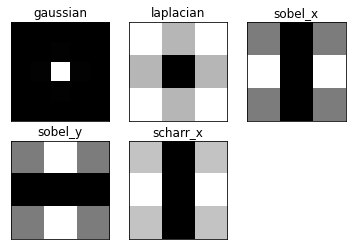

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
scharr = np.array([[-3, 0, 3],[-10,0,10],[-3, 0, 3]])
sobel_x= np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y= np.array([[-1,-2,-1],[0, 0, 0],[1, 2, 1]])
laplacian=np.array([[0, 1, 0],
[1,-4, 1],
[0, 1, 0]])
filters = [gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['gaussian','laplacian', 'sobel_x','sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(5):
        plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
        plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
image2 = cv.imread("C:/Users/VEDIT/Desktop/mike/387011_3d-cute-wallpapers-for-desktop-hd-1-jpg_1024x768_h.jpg")
template = cv.imread("C:/Users/VEDIT/Desktop/mike/object2.jpg")

In [21]:
import copy
image = copy.deepcopy(image2)

In [22]:
cv.imshow('image',image)
cv.waitKey(0)

-1

In [43]:
h, w = template.shape[:2]

In [44]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

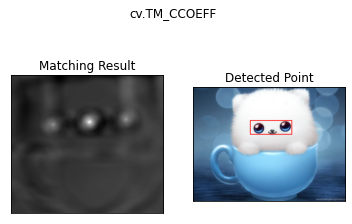

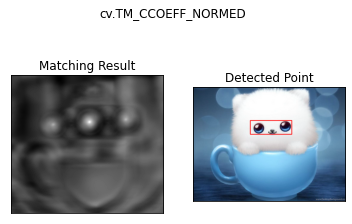

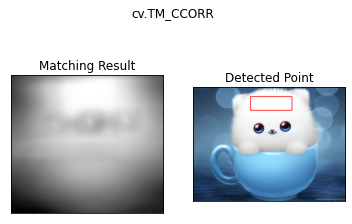

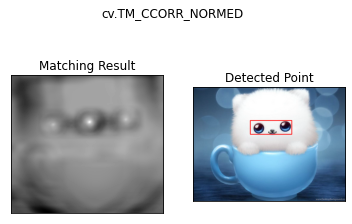

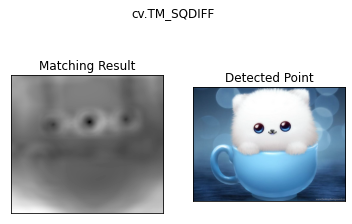

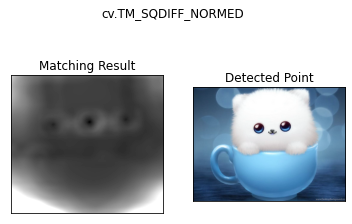

In [46]:
for meth in methods:
    img = copy.deepcopy(image)
    method = eval(meth)
    res = cv.matchTemplate(img,template,method)
    min_val,max_val,min_loc,max_loc = cv.minMaxLoc(res)
    if method in (cv.TM_SQDIFF,cv.TM_SQDIFF_NORMED):
        topleft = min_loc
    else :
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left,bottom_right,255,4)
        
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
        

In [70]:
method = eval('cv.TM_SQDIFF_NORMED')
res = cv.matchTemplate(image,template,method)
min_val,max_val,min_loc,max_loc = cv.minMaxLoc(res)
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(image,top_left,bottom_right,255,2)

array([[[36, 64, 95],
        [36, 64, 95],
        [36, 64, 95],
        ...,
        [36, 59, 85],
        [36, 59, 85],
        [36, 59, 85]],

       [[35, 63, 94],
        [35, 63, 94],
        [35, 63, 94],
        ...,
        [36, 59, 85],
        [36, 59, 85],
        [36, 59, 85]],

       [[35, 63, 94],
        [35, 63, 94],
        [35, 63, 94],
        ...,
        [36, 59, 85],
        [36, 59, 85],
        [36, 59, 85]],

       ...,

       [[32, 47, 73],
        [28, 43, 69],
        [23, 38, 64],
        ...,
        [16, 30, 52],
        [ 7, 19, 43],
        [17, 28, 55]],

       [[30, 45, 71],
        [27, 42, 68],
        [22, 37, 63],
        ...,
        [16, 30, 53],
        [20, 33, 59],
        [ 8, 21, 47]],

       [[26, 41, 67],
        [23, 38, 64],
        [19, 34, 60],
        ...,
        [11, 25, 48],
        [11, 24, 50],
        [12, 25, 51]]], dtype=uint8)

In [71]:
cv.imshow('res',res)
cv.waitKey(0)

-1

In [72]:
cv.imshow('image',image)
cv.waitKey(0)

-1

In [73]:
img = cv.imread("C:/Users/VEDIT/Desktop/mike/cat-example.jpg")

In [74]:
cv.imshow("img",img)
cv.waitKey(0)

-1

In [75]:
import numpy as np

In [78]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)
cv.waitKey(0)

-1

In [81]:
cany = cv.Canny(gray,125,255)
cv.imshow('cany',cany)
cv.waitKey(0)

-1

In [89]:
lines = cv.HoughLines(cany,1,np.pi/180,200)
for rho,theta in lines[2]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)    

In [90]:
cv.imshow('img',img)
cv.waitKey(0)

-1

In [91]:
minlinenght = 100
minlinegap = 10

In [105]:
lines = cv.HoughLinesP(cany,i,np.pi/180,100,minlinenght,minlinegap)
for x1,y1,x2,y2 in lines[10]:
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)

In [106]:
cv.imshow('img',img)
cv.waitKey(0)

-1

In [119]:
image3 = cv.imread("C:/Users/VEDIT/Desktop/mike/387011_3d-cute-wallpapers-for-desktop-hd-1-jpg_1024x768_h.jpg")
image3 = cv.medianBlur(image3,5)

In [120]:
cv.imshow('image',image3)
cv.waitKey(0)

-1

In [121]:
gray = cv.cvtColor(image3,cv.COLOR_BGR2GRAY)
cany2 = cv.Canny(gray,125,255)
cv.imshow('cany',cany2)
cv.waitKey(0)

-1

In [133]:
# circles = cv.HoughCircles(cany,cv.HOUGH_GRADIENT,1,20,param1 = 50,param2 =30,minRadius = 0,maxRadius = 0)
circles = cv.HoughCircles(image,cv.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\hough.cpp:1736: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


In [131]:
for i in circles[0,:]:
    cv.circle(image3,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(image3,(i[0],i[1]),2,(0,255,0),4)
    

In [132]:
cv.imshow('imaf=ge3',image3)
cv.waitKey(0)


-1

In [134]:
img = cv.imread("C:/Users/VEDIT/Desktop/mike/cat-example.jpg")

In [136]:
cv.imshow('img',img)
cv.waitKey(0)

-1

In [137]:
import matplotlib.pyplot as plt

In [142]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

In [144]:
cv.imshow('thresh',thresh)
cv.waitKey(0)

-1

In [145]:
kernel = np.ones((3,3),np.uint8)

In [147]:
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel,iterations = 3)
cv.imshow('opened',opening)
cv.waitKey(0)

-1

In [148]:
surebg = cv.dilate(opening,kernel,iterations = 3)
cv.imshow('surebg,',surebg)
cv.waitKey(0)

-1

In [152]:
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret,sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [154]:
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(surebg,sure_fg)

In [156]:
cv.imshow('unkown',unknown)
cv.waitKey(0)

-1

In [158]:
cv.imshow('surebg',sure_fg)
cv.waitKey(0)

-1

In [159]:
ret,markers = cv.connectedComponents(sure_fg)

In [160]:
markers+=1

In [162]:
markers[unknown == 255] = 0

In [166]:
# markers = cv.watershed(image3,markers)
markers = cv.watershed(img,markers)

In [167]:
img[markers == -1] = [255,0,0]

In [168]:
cv.imshow('img',img)
cv.waitKey(0)

-1